# Regression analysis within variables

Includes: virulence annotation, merops, cazymes, BGCs, metadata, genome statistics

Author: Sandra Godinho Silva \
Creation date: 24/11/2019 \
Version: 0.2 (04/02/2020)

In [82]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression

In [83]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## GHs

In [85]:
cazymes = pd.read_csv("../../3_Annotation/Cazyme_counts.csv")
cazymes = cazymes.rename(columns={"index":"ID"})
cazymes_GH = cazymes[cazymes["ID"].str.contains("GH")]
cazymes_GH = cazymes_GH.set_index("ID").T
cazymes_GH["GH total"] = cazymes_GH.sum(axis=1)
cazymes_GH= cazymes_GH.copy()
cazymes_GH = cazymes_GH.reset_index()
cazymes_GH = cazymes_GH[["index", "GH total"]]
cazymes_GH.tail()

ID,index,GH total
2676,GCA_000744835.1,74
2677,GCA_000422365.1,22
2678,GCA_000243235.1,44
2679,GCA_006777945.1,7
2680,GCA_002909235.1,87


## Merops annotation

In [86]:
merops_orfs = pd.read_csv("Merops_results/merops_counts.csv")
merops_orfs = merops_orfs.rename(columns={"Unnamed: 0":"ID"}).set_index("ID").T
merops_orfs["Merops orfs total"] = merops_orfs.sum(axis=1)
#merops_orfs2 = merops_orfs.copy()
merops_orfs = merops_orfs.reset_index()
merops = merops_orfs[["index", "Merops orfs total"]]
merops_orfs.head()
merops_orfs[["Merops orfs total"]].to_csv("Merops_totals.csv")

In [87]:
merops_orfs

ID,index,MER0001423,MER0001295,MER0192051,MER0001009,MER0028365,MER0281397,MER0095620,MER0034615,MER0036115,MER0003514,MER0002251,MER0031610,MER0000474,MER0037236,MER0034539,MER0069741,MER0047723,MER0001421,MER0437468,MER0045886,MER0019759,MER0001158,MER0014664,MER0033186,MER0002084,MER0001521,MER0066178,MER0001978,MER0004146,MER0026545,MER0000485,MER0010975,MER0034582,MER0042827,MER0004090,MER0031431,MER0001322,MER0015121,MER0048181,MER0000410,MER0003413,MER0195774,MER0013623,MER0004035,MER0030932,MER0060647,MER0015475,MER0039993,MER0001161,MER0002639,MER0026262,MER0001400,MER0044357,MER0025086,MER0003380,MER0011781,MER0012158,MER0014135,MER0004775,MER0011440,MER0004469,MER0016191,MER0035036,MER0013626,MER0005196,MER0005768,MER0013976,MER0209507,MER0005767,MER0005169,MER0003242,MER0005139,MER0005496,MER0065588,MER0168983,MER0028934,MER0001012,MER0013876,MER0026552,MER0073084,MER0056037,MER0042581,MER0003339,MER0034541,MER0017033,MER0044622,MER0005244,MER0027775,MER1143079,MER0000389,MER0026494,MER0001244,MER0017177,MER0001297,MER0001243,MER0001299,MER0014366,MER0016185,MER0036308,MER0005300,MER0002959,MER0014065,MER0056047,MER0004914,MER0035973,MER0030244,MER0002968,MER0015424,MER0059846,MER0897124,MER0003338,MER0000277,MER0011464,MER0000831,MER0140154,MER0002443,MER0003972,MER0006319,MER0005900,MER0010944,MER0001121,MER0042387,MER0013458,MER0077555,MER0031611,MER0003376,MER0011411,MER0001920,MER0002031,MER0005694,MER0059675,MER0000589,MER0017123,MER0002489,MER0005663,MER0062058,MER0031565,MER0004725,MER0001289,MER0005764,MER0003823,MER0036053,MER0001284,MER0491616,MER0000338,MER0001699,MER0005124,MER0042974,MER0001266,MER0013957,MER0223899,MER0033259,MER0013471,MER0027368,MER0100667,MER0066182,MER0001123,MER0033274,MER0492485,MER0001513,MER0002007,MER0017069,MER0013541,MER0187003,MER0038688,MER0005462,MER0017243,MER0017250,MER0001287,MER0003280,MER0000392,MER0003906,MER0156574,MER0036072,MER0000332,MER0002755,MER0065554,MER0173063,MER0015473,MER0014137,MER0017367,MER0003336,MER0000443,MER0011900,MER0030136,MER0003537,MER0036027,MER0028704,MER0017368,MER0004925,MER0000436,MER0004196,MER0002036,MER0001945,MER0011720,MER0195376,MER0015142,MER0198917,MER0004160,MER0028087,MER0016301,MER0028025,MER0000495,MER0001313,MER0003850,MER0028047,MER0213595,MER0001350,MER0004931,MER0043394,MER0056525,MER0078640,MER0036114,MER0002565,MER0002060,MER0011509,MER0000471,MER0045094,MER0175622,MER0017401,MER0000432,MER0023167,MER0061102,MER0026339,MER0013425,MER0034548,MER0030235,MER0043126,MER0034659,MER0031563,MER0001236,MER0000472,MER0056022,MER0015462,MER0015691,MER0214939,MER0004199,MER0018254,MER0017248,MER0002601,MER0028284,MER0023251,MER0003105,MER0004801,MER0004154,MER0002746,MER0019881,MER0014333,MER0036073,MER0011416,MER0029719,MER0034558,MER0020326,MER0043008,MER0017142,MER0030934,MER0001612,MER0024252,MER0000265,MER0044996,MER0026213,MER0011256,MER0004954,MER0002642,MER0004514,MER0033237,MER0000313,MER0011907,MER0013450,MER0001269,MER0237414,MER0045479,MER0031432,MER0026496,MER0015621,MER0000310,MER0019096,MER0000320,MER0016067,MER0014188,MER0031558,MER0017239,MER0036052,MER0019092,MER0015632,MER0018473,MER0003327,MER0011345,MER0011806,MER0003448,MER0001233,MER0044578,MER0003359,MER0035017,MER0004321,MER0036038,MER0015336,MER0183709,MER0107796,MER0035032,MER0003817,MER0001425,MER0005778,MER0428540,MER0031556,MER0036036,MER0014721,MER0091680,MER0002655,MER0004468,MER0012283,MER0004923,MER0013829,MER0000263,MER0002161,MER0014418,MER0011700,MER0031491,MER0001333,MER0026471,MER0003558,MER0031562,MER0002014,MER0067221,MER0167712,MER0017193,MER0011583,MER0000431,MER0033176,MER0000576,MER0013479,MER0003543,MER0015166,MER0219770,MER0001495,MER0011369,MER0031614,MER0472834,MER0003812,MER0014140,MER0034745,MER0006204,MER0031618,MER0002455,MER0015657,MER0017009,MER0006198,MER0005045,MER0011666,MER0015415,MER0001010,MER0200437,MER0015684,MER0001380,MER0015459,MER0001520,MER0036047,MER0066184,MER0005821,MER0001026,MER0005925,MER0003986,MER000448

In [88]:
stats = pd.read_csv("stats.csv")
stats.head()

,Assembly accession,ORFs,CAZymes,Peptidases
0,GCA_002431085.1,2758,47,NaN
1,GCA_002302445.1,2226,65,NaN
2,GCA_014075215.1,4465,52,NaN
3,GCA_900186555.1,2294,56,NaN
4,GCA_001670625.1,1980,38,NaN


In [89]:
merge = pd.merge(stats, merops_orfs[["index","Merops orfs total"]], how="left", left_on="Assembly accession", right_on="index")
merge.to_csv("stats2.csv")

## Merge with other tables:

In [90]:
metadata = pd.read_csv("../F3/All_info.csv")
metadata = metadata[["Assembly accession","Genus","Family", "scaf_bp", "Completeness", "MAG","Origin"]]
metadata.tail(2)

,Assembly accession,Genus,Family,scaf_bp,Completeness,MAG,Origin
2678,GCA_903819445.1,Flavobacterium,Flavobacteriaceae,5508144,99.65,False,Unclassified
2679,GCA_903969135.1,Chryseobacterium,Weeksellaceae,5227721,100.00,False,Non_marine


In [91]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
print(len(statistics))
statistics.tail()

2681


,Unnamed: 0,orfs,pfam,ko,cog,cazymes,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
2676,GCA_000744835.1,3236,5914,1415,2231,123,43.726823,68.943140,3.800989
2677,GCA_000422365.1,2688,4856,1130,1787,70,42.038690,66.480655,2.604167
2678,GCA_000243235.1,3516,6027,1393,2326,105,39.618885,66.154721,2.986348
2679,GCA_006777945.1,2393,4131,997,1550,55,41.663184,64.772252,2.298370
2680,GCA_002909235.1,4633,7692,1724,2980,153,37.211310,64.321174,3.302396


In [92]:
bgcs = pd.read_csv("../../3_Annotation/antismash_results/BGCs_resumed.csv")
bgcs= bgcs.set_index("index").T
bgcs["Nr_BGCs"] = bgcs.sum(axis=1)
print(len(bgcs))
bgcs.head()

2542


index,NRPS,NRPS_PKS_hybrid,NRPS_other,Others,PKSI,PKSIII,PKS_other,RiPPs,Siderophore,terpene,transAT_PSK,Nr_BGCs
GCA_002831645.1,0,0,0,1,0,1,0,1,0,1,0,4
GCA_001971785.1,0,0,0,0,0,0,0,1,0,1,0,2
GCA_002951395.1,0,0,0,0,0,0,0,0,1,1,0,2
GCA_903969135.1,1,0,0,1,0,0,1,3,1,1,0,8
GCA_009664855.1,0,0,0,2,0,1,0,2,0,2,0,7


## Main table:

In [93]:
df = pd.merge(merops, metadata, how="left", left_on="index", right_on="Assembly accession")
df = pd.merge(df, cazymes_GH, how="left",  left_on="index", right_on="index")
df.tail(2)

,index,Merops orfs total,Assembly accession,Genus,Family,scaf_bp,Completeness,MAG,Origin,GH total
2679,GCA_004214315.1,72,GCA_004214315.1,TMED96,Flavobacteriaceae,1400021.0,83.46,True,Marine,15
2680,GCA_900610275.1,109,GCA_900610275.1,Flavobacterium,Flavobacteriaceae,2786327.0,99.29,False,Non_marine,7


In [94]:
merge = pd.merge(statistics[["Unnamed: 0","cazymes","Orfs_anno_cazymes%","orfs"]], merops, how="left", left_on="Unnamed: 0", right_on="index")
merge = pd.merge(merge, cazymes_GH, how="left", left_on="index", right_on="index")

merge["Orfs_anno_merops%"] = merge["Merops orfs total"]/merge["orfs"]*100
merge =pd.merge(merge,metadata, how="right", left_on="Unnamed: 0", right_on="Assembly accession")

merge = pd.merge(merge, bgcs["Nr_BGCs"],  how="left", left_on="index", right_index=True )
merge = merge.fillna(0)

print(len(merge))

merge["PEP:GH"] = merge["Merops orfs total"]/merge["cazymes"]
merge["BGCs/genomesize"]=merge["Nr_BGCs"]/merge["scaf_bp"]
print(len(merge))

merge["merops_perMb"] = merge["Merops orfs total"]/merge["scaf_bp"]*1000000
merge["bgc_perMb"] = merge["Nr_BGCs"]/merge["scaf_bp"]*1000000
merge["cazymes_perMb"] = merge["cazymes"]/merge["scaf_bp"]*1000000

merge["PEP:GH_permb"] = merge["merops_perMb"]/merge["cazymes_perMb"]
print(len(merge))

#merge=merge.sort_values(by="PEP:GH")
merge.to_csv("To_statistics.csv")
print(merge.tail())

2680
2680
2680
           Unnamed: 0  cazymes  Orfs_anno_cazymes%  orfs            index  \
2675  GCA_903166575.1       86            2.215924  3881  GCA_903166575.1   
2676  GCA_903819335.1      243            5.105042  4760  GCA_903819335.1   
2677  GCA_903819435.1      263            5.227589  5031  GCA_903819435.1   
2678  GCA_903819445.1      247            5.364900  4604  GCA_903819445.1   
2679  GCA_903969135.1      115            2.428209  4736  GCA_903969135.1   

      Merops orfs total  GH total  Orfs_anno_merops% Assembly accession  \
2675                164        35           4.225715    GCA_903166575.1   
2676                180       167           3.781513    GCA_903819335.1   
2677                166       165           3.299543    GCA_903819435.1   
2678                166       159           3.605560    GCA_903819445.1   
2679                215        55           4.539696    GCA_903969135.1   

                 Genus             Family  scaf_bp  Completeness    MAG

In [95]:
dfx = merge.groupby(['Genus', "Family"]).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).describe()#.reset_index().sort_values(by=["Family","Genus"])
dfx.columns = [' '.join(col).strip() for col in dfx.columns.values]
dfx.columns = dfx.columns.get_level_values(0)

#.set_index("Genus")
#df1["P"] = df1["Merops orfs total"]/(df1["cazymes"]+df1["Merops orfs total"])*2
#df1["P2"] = df1["merops_permb"]/(df1["cazymes_permb"]+df1["merops_permb"])*2
dfx.head()

,,cazymes count,cazymes mean,cazymes std,cazymes min,cazymes 25%,cazymes 50%,cazymes 75%,cazymes max,Orfs_anno_cazymes% count,Orfs_anno_cazymes% mean,Orfs_anno_cazymes% std,Orfs_anno_cazymes% min,Orfs_anno_cazymes% 25%,Orfs_anno_cazymes% 50%,Orfs_anno_cazymes% 75%,Orfs_anno_cazymes% max,orfs count,orfs mean,orfs std,orfs min,orfs 25%,orfs 50%,orfs 75%,orfs max,Merops orfs total count,Merops orfs total mean,Merops orfs total std,Merops orfs total min,Merops orfs total 25%,Merops orfs total 50%,Merops orfs total 75%,Merops orfs total max,GH total count,GH total mean,GH total std,GH total min,GH total 25%,GH total 50%,GH total 75%,GH total max,Orfs_anno_merops% count,Orfs_anno_merops% mean,Orfs_anno_merops% std,Orfs_anno_merops% min,Orfs_anno_merops% 25%,Orfs_anno_merops% 50%,Orfs_anno_merops% 75%,Orfs_anno_merops% max,scaf_bp count,scaf_bp mean,scaf_bp std,scaf_bp min,scaf_bp 25%,scaf_bp 50%,scaf_bp 75%,scaf_bp max,Completeness count,Completeness mean,Completeness std,Completeness min,Completeness 25%,Completeness 50%,Completeness 75%,Completeness max,Nr_BGCs count,Nr_BGCs mean,Nr_BGCs std,Nr_BGCs min,Nr_BGCs 25%,Nr_BGCs 50%,Nr_BGCs 75%,Nr_BGCs max,PEP:GH count,PEP:GH mean,PEP:GH std,PEP:GH min,PEP:GH 25%,PEP:GH 50%,PEP:GH 75%,PEP:GH max,BGCs/genomesize count,BGCs/genomesize mean,BGCs/genomesize std,BGCs/genomesize min,BGCs/genomesize 25%,BGCs/genomesize 50%,BGCs/genomesize 75%,BGCs/genomesize max,merops_perMb count,merops_perMb mean,merops_perMb std,merops_perMb min,merops_perMb 25%,merops_perMb 50%,merops_perMb 75%,merops_perMb max,bgc_perMb count,bgc_perMb mean,bgc_perMb std,bgc_perMb min,bgc_perMb 25%,bgc_perMb 50%,bgc_perMb 75%,bgc_perMb max,cazymes_perMb count,cazymes_perMb mean,cazymes_perMb std,cazymes_perMb min,cazymes_perMb 25%,cazymes_perMb 50%,cazymes_perMb 75%,cazymes_perMb max,PEP:GH_permb count,PEP:GH_permb mean,PEP:GH_permb std,PEP:GH_permb min,PEP:GH_permb 25%,PEP:GH_permb 50%,PEP:GH_permb 75%,PEP:GH_permb max
Genus,Family,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aequorivita,Flavobacteriaceae,42.0,53.309524,9.549583,20.0,50.25,55.5,58.50,72.0,42.0,1.796647,0.261310,0.801282,1.732871,1.846056,1.962686,2.254933,42.0,2958.714286,286.041809,2178.0,2864.50,2997.5,3081.50,3622.0,42.0,124.642857,16.007348,83.0,115.5,126.0,130.75,167.0,42.0,6.857143,2.627912,2.0,5.00,7.0,8.00,15.0,42.0,4.210442,0.328778,3.083392,4.071686,4.240784,4.439570,4.711506,42.0,3.200450e+06,3.374418e+05,2300656.0,3081628.25,3193359.0,3327236.0,4042904.0,42.0,95.061429,7.337054,70.29,91.895,98.48,99.24,100.00,42.0,2.952381,0.696765,1.0,3.00,3.0,3.0,5.0,42.0,2.390956,0.381283,1.925926,2.203571,2.287088,2.438595,4.150000,42.0,9.272511e-07,2.270552e-07,2.715462e-07,9.016530e-07,9.394500e-07,9.869393e-07,1.738635e-06,42.0,38.918196,2.542492,29.704551,37.620098,39.384413,40.525472,43.249667,42.0,0.927251,0.227055,0.271546,0.901653,0.939450,0.986939,1.738635,42.0,16.612573,2.397458,7.994864,15.742118,16.964762,18.220938,20.450647,42.0,2.390956,0.381283,1.925926,2.203571,2.287088,2.438595,4.150000
Algibacter,Flavobacteriaceae,9.0,178.888889,18.751296,139.0,168.00,183.0,192.00,199.0,9.0,4.441777,0.622105,3.290775,4.023155,4.444444,4.988309,5.076531,9.0,4080.777778,624.058847,3455.0,3849.00,3851.0,3920.00,5561.0,9.0,134.888889,6.772083,127.0,131.0,131.0,140.00,148.0,9.0,116.777778,17.049764,86.0,101.00,128.0,128.00,132.0,9.0,3.347715,0.328416,2.661392,3.401714,3.403481,3.571429,3.675832,9.0,4.651915e+06,1.936653e+05,4167837.0,4638103.00,4705407.0,4707503.0,4816342.0,9.0,98.622222,1.892120,94.71,99.340,99.56,99.67,99.67,9.0,1.777778,0.440959,1.0,2.00,2.0,2.0,2.0,9.0,0.761134,0.083292,0.682292,0.682292,0.754190,0.808743,0.913669,9.0,3.800332e-07,8.671347e-08,2.156054e-07,4.152529e-07,4.248537e-07,4.250429e-07,4.330570e-07,9.0,29.010905,1.223070,27.827916,27.840312,28.770422,30.400360,30.731031,9.0,0.380033,0.086713,0.215605,0.415253,0.424854,0.425043,0.433057,9.0,38.375071,2.7924

In [96]:
df_origin = merge.groupby(["Origin"])[["Merops orfs total","cazymes"]].describe()#.reset_index().sort_values(by=["Family","Genus"])~
df_origin.columns = [' '.join(col).strip() for col in df_origin.columns.values]
df_origin.columns = df_origin.columns.get_level_values(0)

#.set_index("Genus")
#df1["P"] = df1["Merops orfs total"]/(df1["cazymes"]+df1["Merops orfs total"])*2
#df1["P2"] = df1["merops_permb"]/(df1["cazymes_permb"]+df1["merops_permb"])*2

#df_origin = pd.melt(df_origin.reset_index(), id_vars=['Origin'], value_vars=['merops_perMb'])
df_origin.head()

,Merops orfs total count,Merops orfs total mean,Merops orfs total std,Merops orfs total min,Merops orfs total 25%,Merops orfs total 50%,Merops orfs total 75%,Merops orfs total max,cazymes count,cazymes mean,cazymes std,cazymes min,cazymes 25%,cazymes 50%,cazymes 75%,cazymes max
Origin,,,,,,,,,,,,,,,,
Marine,792.0,119.523990,41.504962,31.0,90.0,122.0,145.0,291.0,792.0,76.088384,46.319506,8.0,40.75,65.0,100.0,266.0
Non_marine,898.0,139.018931,39.039566,40.0,108.0,135.0,169.0,248.0,898.0,89.789532,51.397149,13.0,55.00,83.0,107.0,307.0
Unclassified,990.0,139.371717,38.215254,38.0,109.0,137.0,165.0,269.0,990.0,96.212121,53.371577,19.0,56.00,88.5,112.0,316.0


In [97]:
a = df_origin.reset_index().melt(id_vars="Origin",value_vars=["Merops orfs total mean","cazymes mean"])
a["id"] = a["Origin"] +"_"+a["variable"].str.replace(" mean","")
a=a[["id","value"]]
a= a.rename(columns={"value":"mean"})

b = df_origin.reset_index().melt(id_vars="Origin",value_vars=["Merops orfs total std","cazymes std"])
b["id"] = b["Origin"] +"_"+b["variable"].str.replace(" std","")
b=b[["id","value"]]
b= b.rename(columns={"value":"std"})

merge_ab = pd.merge(a,b, how="left", left_on="id", right_on="id")


c = df_origin.reset_index().melt(id_vars="Origin",value_vars=["Merops orfs total max","cazymes max"])
c["id"] = c["Origin"] +"_"+c["variable"].str.replace(" max","")
c=c[["id","value"]]
c= c.rename(columns={"value":"max"})
merge_ab = pd.merge(merge_ab,c, how="left", left_on="id", right_on="id")

d = df_origin.reset_index().melt(id_vars="Origin",value_vars=["Merops orfs total min","cazymes min"])
d["id"] = d["Origin"] +"_"+d["variable"].str.replace(" min","")
d=d[["id","value"]]
d= d.rename(columns={"value":"min"})
merge_ab = pd.merge(merge_ab,d, how="left", left_on="id", right_on="id")


e = df_origin.reset_index().melt(id_vars="Origin",value_vars=["Merops orfs total 50%","cazymes 50%"])
e["id"] = e["Origin"] +"_"+e["variable"].str.replace(" 50%","")
e=e[["id","value"]]
e= e.rename(columns={"value":"median"})
merge_ab = pd.merge(merge_ab,e, how="left", left_on="id", right_on="id")

merge_ab.head(10)

,id,mean,std,max,min,median
0,Marine_Merops orfs total,119.523990,41.504962,291.0,31.0,122.0
1,Non_marine_Merops orfs total,139.018931,39.039566,248.0,40.0,135.0
2,Unclassified_Merops orfs total,139.371717,38.215254,269.0,38.0,137.0
3,Marine_cazymes,76.088384,46.319506,266.0,8.0,65.0
4,Non_marine_cazymes,89.789532,51.397149,307.0,13.0,83.0
5,Unclassified_cazymes,96.212121,53.371577,316.0,19.0,88.5


<Figure size 720x216 with 0 Axes>

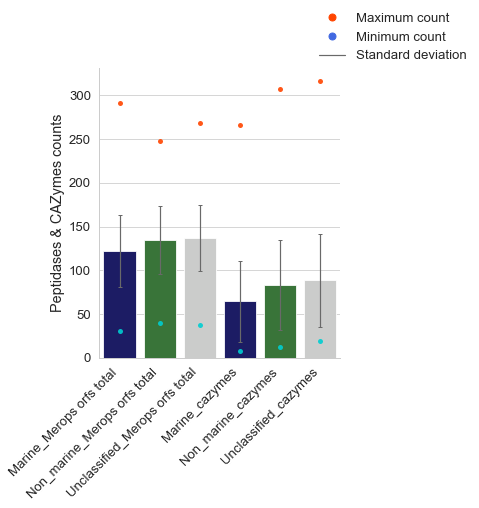

In [98]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) 

plt.figure(figsize=(10,3))

my_colors=["#101070","#2f7e2f","#cbcccb"]

g = sns.catplot(
    data=merge_ab, kind="bar", palette=my_colors,
    x='id', dodge=False, legend_out=True, 
    y='median', #xerr="std",
    height=5, # make the plot 7 units high
    aspect=1) # height is n times width


#g._legend.set_bbox_to_anchor((0.12, 0.92))

g.map(plt.errorbar, "id", "median", "std", ls='none', capsize=2, color="dimgrey")

#g.map(plt.scatter(x="Genus",y="Nr_BGCs_max"))

sns.stripplot(x='id',y='max', data=merge_ab, jitter=False, color="orangered", alpha=0.9)
sns.stripplot(x='id',y='min', data=merge_ab, jitter=False, color="darkturquoise", alpha=0.9)

plt.xlabel('') #, fontsize=15
plt.ylabel('Peptidases & CAZymes counts')#fontsize=13

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='orangered', marker='o', ls="",
                          markersize=7, label='Maximum count')
blue_line = mlines.Line2D([], [], color='royalblue', marker='o',ls="",
                          markersize=7, label='Minimum count')
black_line=mlines.Line2D([], [], color='dimgrey', #marker='',
                          markersize=7, label='Standard deviation')
plt.legend(handles=[red_line,blue_line, black_line], bbox_to_anchor=(0.89, 1), loc=(0,2), borderaxespad=0.);

#plt.show()    
ax = plt.gca()
g.savefig("not_normalized.svg")

In [99]:
df_origin.reset_index().melt(id_vars="Origin",value_vars=["Merops orfs total std","cazymes std"])

,Origin,variable,value
0,Marine,Merops orfs total std,41.504962
1,Non_marine,Merops orfs total std,39.039566
2,Unclassified,Merops orfs total std,38.215254
3,Marine,cazymes std,46.319506
4,Non_marine,cazymes std,51.397149
5,Unclassified,cazymes std,53.371577


<AxesSubplot:xlabel='Origin'>

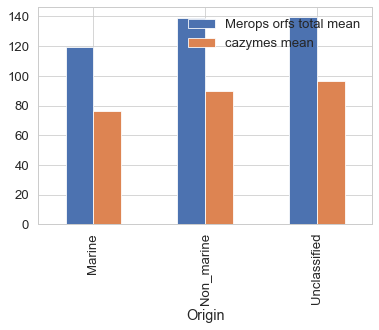

In [100]:
df_origin[["Merops orfs total mean","cazymes mean",]].plot(kind="bar")#.unstack('Origin').to_frame()#.T#.droplevel(level=0) #"merops_perMb std","cazymes_perMb std"

In [101]:
df_origin

,Merops orfs total count,Merops orfs total mean,Merops orfs total std,Merops orfs total min,Merops orfs total 25%,Merops orfs total 50%,Merops orfs total 75%,Merops orfs total max,cazymes count,cazymes mean,cazymes std,cazymes min,cazymes 25%,cazymes 50%,cazymes 75%,cazymes max
Origin,,,,,,,,,,,,,,,,
Marine,792.0,119.523990,41.504962,31.0,90.0,122.0,145.0,291.0,792.0,76.088384,46.319506,8.0,40.75,65.0,100.0,266.0
Non_marine,898.0,139.018931,39.039566,40.0,108.0,135.0,169.0,248.0,898.0,89.789532,51.397149,13.0,55.00,83.0,107.0,307.0
Unclassified,990.0,139.371717,38.215254,38.0,109.0,137.0,165.0,269.0,990.0,96.212121,53.371577,19.0,56.00,88.5,112.0,316.0


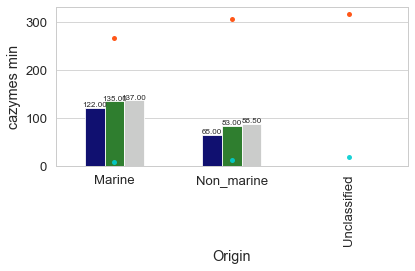

In [102]:
my_colors=["#101070","#2f7e2f","#cbcccb"]

ax = df_origin[["Merops orfs total 50%","cazymes 50%"]].T.plot(kind="bar", color=my_colors, legend=False)

plt.ylabel('CAZymes & Peptidases')
plt.xticks( horizontalalignment='center', rotation=360)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}'.format(y), (x.mean(),y),ha='center', va='bottom', fontsize=8) # set the alignment of the text

sns.stripplot(x='Origin',y='cazymes max', data=df_origin.reset_index(), jitter=False, color="orangered", alpha=0.9)
sns.stripplot(x='Origin',y='cazymes min', data=df_origin.reset_index(), jitter=False, color="darkturquoise", alpha=0.9)


plt.tight_layout()
plt.show()

ax.figure.savefig("Ratio.svg", dpi=300)

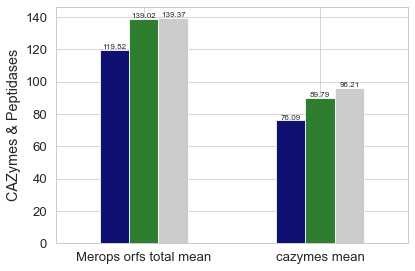

In [103]:

ax = df_origin[["Merops orfs total mean","cazymes mean"]].T.plot(kind="bar", color=my_colors, legend=False)

plt.ylabel('CAZymes & Peptidases')
plt.xticks( horizontalalignment='center', rotation=360) #rotation=-180,

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}'.format(y), (x.mean(),y),ha='center', va='bottom', fontsize=8) # set the alignment of the text

#sns.stripplot(x='Origin',y='cazymes_perMb max', data=df_origin.reset_index(), jitter=False, color="orangered", alpha=0.9)
#sns.stripplot(x='Origin',y='cazymes_perMb min', data=df_origin.reset_index(), jitter=False, color="darkturquoise", alpha=0.9)


plt.tight_layout()
plt.show()

<ipython-input-104-b34322eba57c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merge.groupby("Origin")["cazymes","Merops orfs total", "Nr_BGCs"].mean().plot(kind="bar")


<AxesSubplot:xlabel='Origin'>

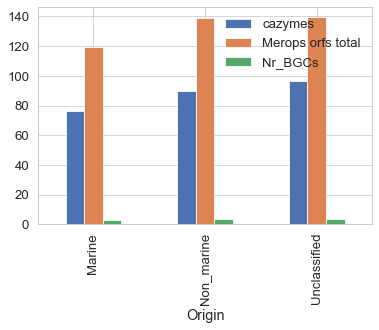

In [104]:
merge.groupby("Origin")["cazymes","Merops orfs total", "Nr_BGCs"].mean().plot(kind="bar")